In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.size

670

In [6]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


<AxesSubplot:xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

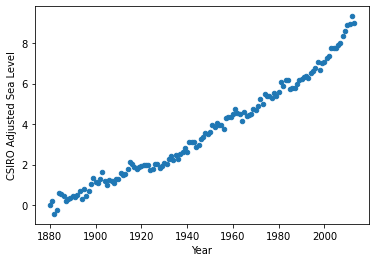

In [8]:
df.plot.scatter(x = 'Year', y = 'CSIRO Adjusted Sea Level')

In [17]:
Lin_Reg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

Text(0, 0.5, 'Sea Level (inches)')

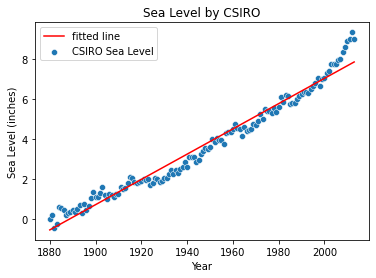

In [21]:
y2=Lin_Reg.intercept + Lin_Reg.slope * df['Year']
sns.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df,label='CSIRO Sea Level')
sns.lineplot(x='Year',y= y2,data=df,color='r',label='fitted line')
plt.title('Sea Level by CSIRO')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

In [24]:
df_2000 = df[df['Year'] >= 2000]
Lin_Reg_Last = linregress(x=df_2000['Year'], y=df_2000['CSIRO Adjusted Sea Level'])
print(Lin_Reg_Last)

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


Text(0, 0.5, 'Sea Level (inches)')

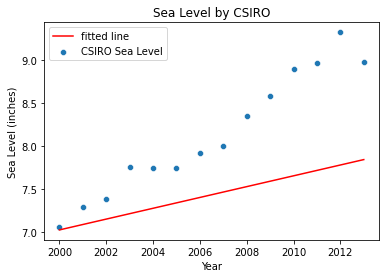

In [26]:
y=Lin_Reg.intercept + Lin_Reg.slope * df_2000['Year']
sns.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df_2000,label='CSIRO Sea Level')
sns.lineplot(x='Year',y= y2,data=df_2000,color='r',label='fitted line')
plt.title('Sea Level by CSIRO')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')

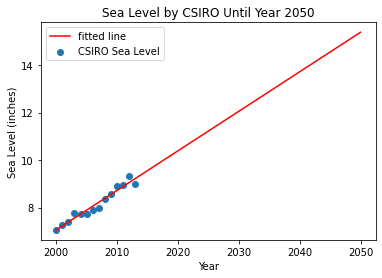

In [27]:
x1= df_2000['Year']
y1=df_2000['CSIRO Adjusted Sea Level']
x2=np.arange(2000,2051)
y2=Lin_Reg_Last.intercept + Lin_Reg_Last.slope*x2
plt.scatter(x1, y1, label='CSIRO Sea Level')
plt.plot(x2, y2, label='fitted line',color='r')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level by CSIRO Until Year 2050')
plt.legend()
plt.show()

In [28]:
val_2050 = Lin_Reg_Last.intercept + Lin_Reg_Last.slope*2050
print(val_2050)

15.382443524364874
